In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [6]:
data = pd.read_csv('spambase.data', header=None)
print(all([i==0 for i in pd.isna(data).sum()]))
#Nie ma wartosci brakujących
data.info()

True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64


In [7]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [8]:
y = data.iloc[:,57]
data = data.drop(57, inplace = False, axis=1)
data_scaled = StandardScaler().fit_transform(data)

In [9]:
inertia = []
silhoette = []
chb = []
dbd = []
k = np.arange(2,13)

for i in k:
    alg = KMeans(n_clusters = i, random_state = 123).fit(data)
    inertia.append(alg.inertia_)
    silhoette.append(metrics.silhouette_score(data, alg.labels_))
    chb.append(metrics.calinski_harabasz_score(data, alg.labels_))
    dbd.append(metrics.davies_bouldin_score(data, alg.labels_))

([<matplotlib.axis.XTick at 0x20fac1ad7c8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

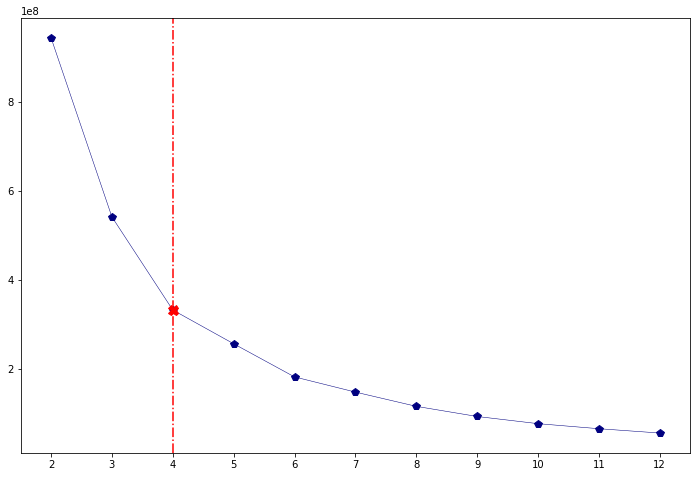

In [10]:
plt.figure(figsize=(12,8))
plt.plot(k, inertia, marker='p', c='navy', linewidth=.5, markersize=8)
plt.plot(k[2], inertia[2], 'X', c='r', markersize=10)
plt.axvline(x=4, linestyle='-.', c='r')
plt.xticks(k)

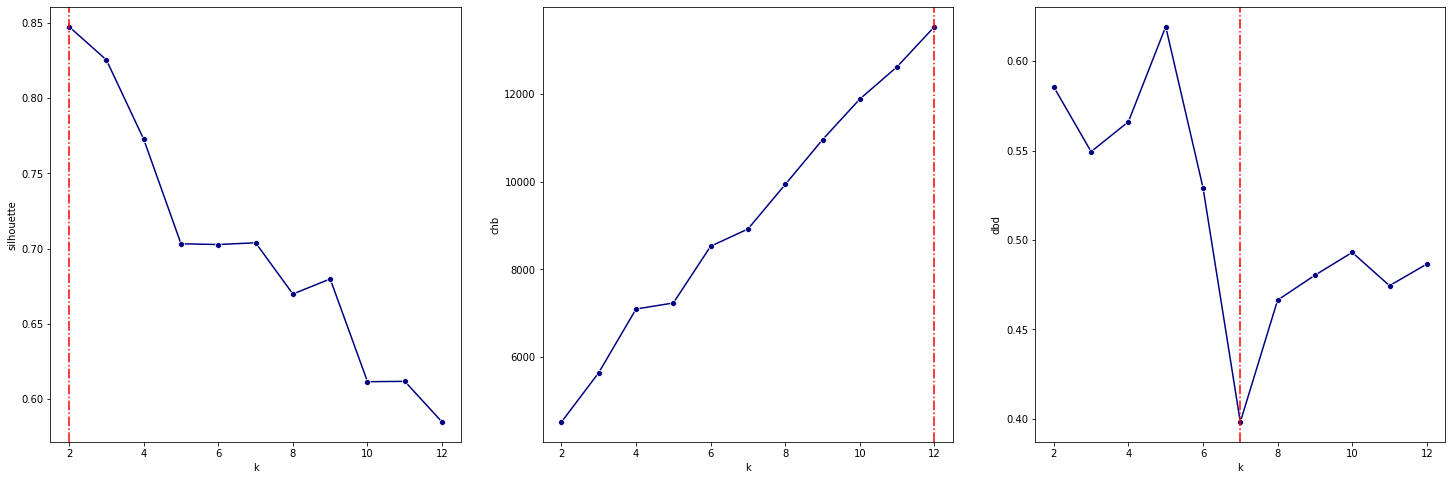

In [11]:
scores = pd.DataFrame({
    'k':k,
    'inertia':inertia,
    'silhouette':silhoette,
    'chb':chb,
    'dbd':dbd
})
fig, ax = plt.subplots(figsize=(25,8),ncols=3,nrows=1)
for metric, i in zip(scores.columns[2:], range(0, len(scores.columns[2:]))):
    sns.lineplot(data = scores, x = 'k', y = metric, color='navy', marker='o', ax=ax[i])
    if (metric in ['silhouette','chb']):
        ax[i].axvline(x=np.argmax(scores[metric])+2, linestyle='-.', c='r')
    else:
        ax[i].axvline(x=np.argmin(scores[metric])+2, linestyle='-.', c='r')

In [12]:
pca3 = PCA(n_components=3, random_state=123).fit_transform(data_scaled)
km = KMeans(n_clusters=4).fit(pca3)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


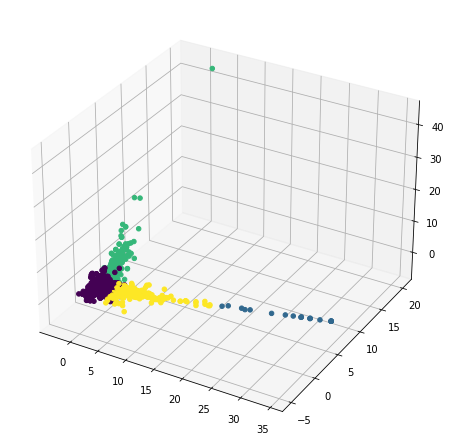

In [13]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.scatter(pca3[:,0], pca3[:,1], pca3[:,2], c=km.labels_,alpha=1)

<AxesSubplot:>

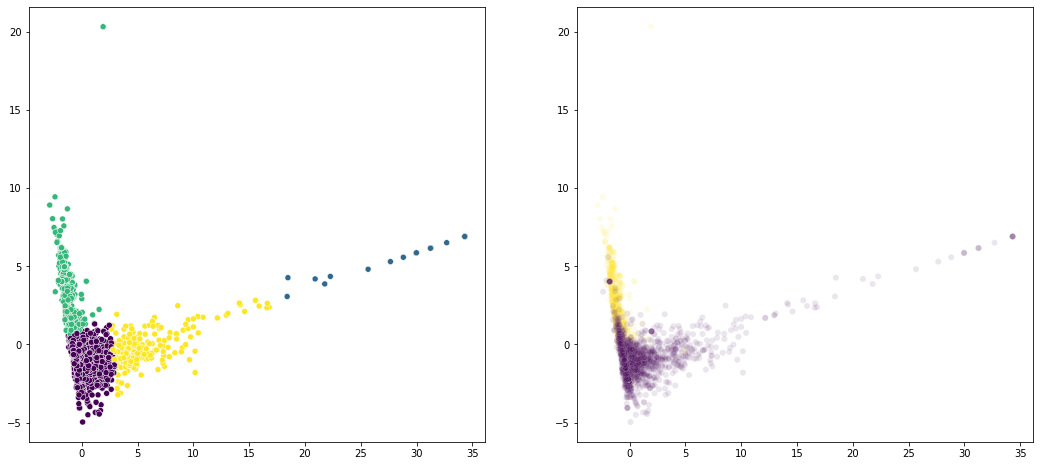

In [42]:
pca2 = PCA(n_components=2, random_state=123).fit_transform(data_scaled)
km = KMeans(n_clusters=4).fit(pca2)

fig, ax = plt.subplots(figsize=(18,8), ncols=2, nrows=1)
sns.scatterplot(x = pca2[:, 0], y = pca2[:, 1], c=km.labels_, ax=ax[0])
sns.scatterplot(x = pca2[:, 0], y = pca2[:, 1], c=y, ax=ax[1], alpha=0.1)

<AxesSubplot:>

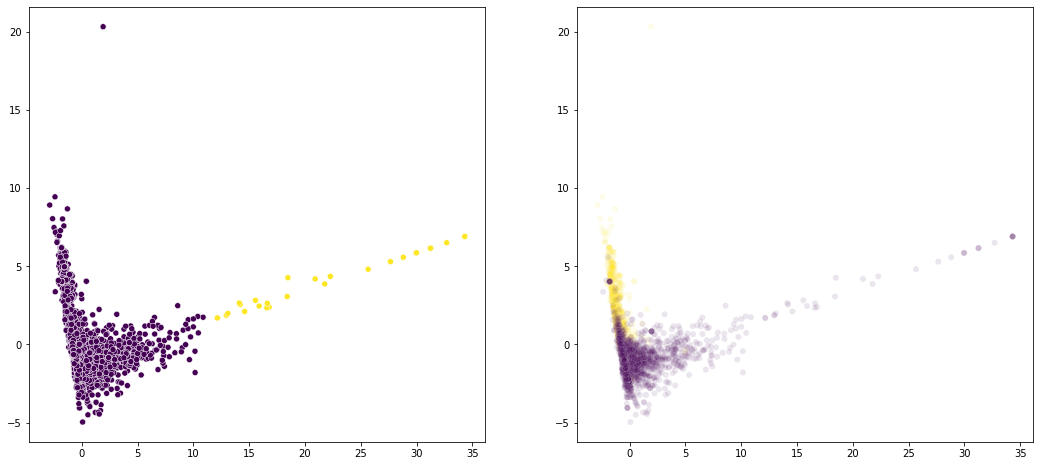

In [46]:
km = KMeans(n_clusters=2).fit(pca2)
fig, ax = plt.subplots(figsize=(18,8), ncols=2, nrows=1)
sns.scatterplot(x = pca2[:, 0], y = pca2[:, 1], c=km.labels_, ax=ax[0])
sns.scatterplot(x = pca2[:, 0], y = pca2[:, 1], c=y, ax=ax[1], alpha=0.1)

In [318]:
#sum(km.labels_!=km.predict(data_scaled))

0

In [320]:
#data.drop('y_km', inplace=True, axis=1)
data.insert(len(data.columns), 'y_km', pd.Series(km.labels_))
#data.drop('y', inplace=True, axis=1)
data.insert(len(data.columns), 'y', y)

In [321]:
pd.crosstab(data['y_km'], data['y'])

y,0,1
y_km,,
0,2754,1813
1,34,0


In [333]:
data.iloc[:,:-1].groupby('y_km').agg(['mean', 'var']).T

y_km                 0           1
0  mean       0.105332    0.000000
   var        0.093856    0.000000
1  mean       0.213212    0.186471
   var        1.669437    1.182224
2  mean       0.282746    0.000000
...                ...         ...
54 var     1014.216257    0.240517
55 mean      52.479527   10.970588
   var    38252.718317    0.090018
56 mean     285.116926   37.794118
   var   369942.200955  152.774510

[114 rows x 2 columns]

In [33]:
pca2 = PCA(n_components=2, random_state=123).fit_transform(data_scaled)
dbscan = DBSCAN(eps=3, min_samples=2, metric='euclidean').fit(pca2)

In [34]:
data_test = data

In [35]:
data.drop('y_dbscan', inplace=True, axis=1)
data_test.insert(len(data_test.columns), 'y_dbscan', dbscan.labels_)

<AxesSubplot:>

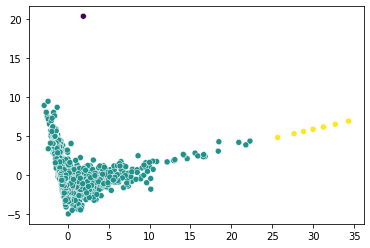

In [36]:
sns.scatterplot(x = pca2[:, 0], y = pca2[:, 1], c=dbscan.labels_)

In [37]:
np.unique(dbscan.labels_)

array([-1,  0,  1], dtype=int64)

In [38]:
data_test[data_test.y_dbscan==-1]

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,y_dbscan
1753,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.024,9.752,0.003,1.542,1.785,1.998,239.571,9989,10062,-1
